In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory(r"C:\Users\ELCOT\Desktop\Python\new\Dataset\train_set",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory(r"C:\Users\ELCOT\Desktop\Python\new\Dataset\test_set",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 436 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [3]:
test_dataset.class_indices

{'forest': 0, 'with fire': 1}

In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

Epoch 1/10
14/14 [==============================] - 96s 7s/step - loss: 0.5717 - accuracy: 0.6552 - val_loss: 0.2805 - val_accuracy: 0.8750
Epoch 2/10
14/14 [==============================] - 84s 6s/step - loss: 0.3266 - accuracy: 0.8434 - val_loss: 0.1193 - val_accuracy: 0.9667
Epoch 3/10
14/14 [==============================] - 74s 5s/step - loss: 0.2247 - accuracy: 0.9227 - val_loss: 0.1184 - val_accuracy: 0.9500
Epoch 4/10
14/14 [==============================] - 75s 5s/step - loss: 0.1682 - accuracy: 0.9425 - val_loss: 0.0206 - val_accuracy: 1.0000
Epoch 5/10
14/14 [==============================] - 82s 6s/step - loss: 0.1173 - accuracy: 0.9610 - val_loss: 0.0631 - val_accuracy: 0.9667
Epoch 6/10
14/14 [==============================] - 76s 6s/step - loss: 0.0925 - accuracy: 0.9741 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 7/10
14/14 [==============================] - 80s 6s/step - loss: 0.0884 - accuracy: 0.9714 - val_loss: 0.0194 - val_accuracy: 1.0000
Epoch 8/10
14/14 [==

In [7]:
model.save("forest1.h5")

In [8]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

In [9]:
predictions

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],

In [10]:
print(len(predictions))

120


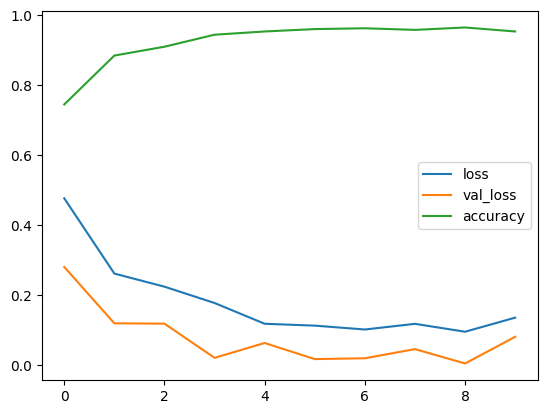

In [11]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.plot(r.history['accuracy'], label='accuracy')
plt.legend()

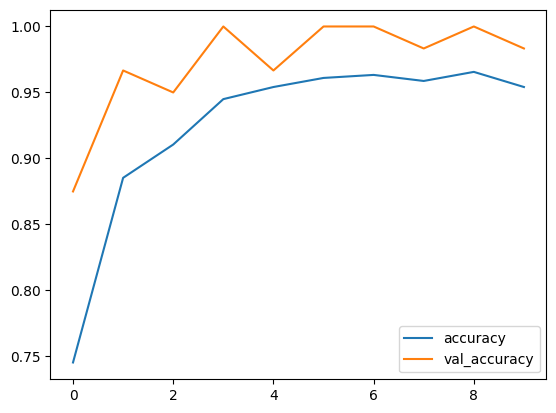

In [12]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [13]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("Fire")
    elif val == 0:
        plt.xlabel("No Fire")

[[1.]]


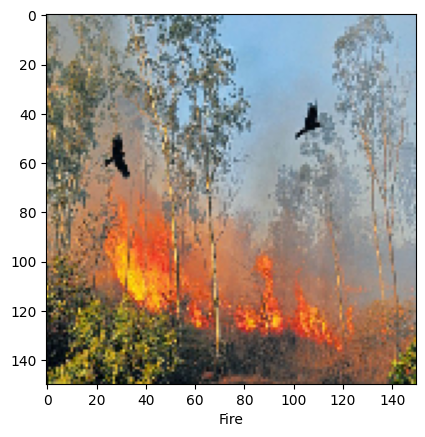

In [14]:
predictImage(r"C:\Users\ELCOT\Desktop\Python\new\Dataset\test_set\with fire\599857.jpg")

[[0.]]


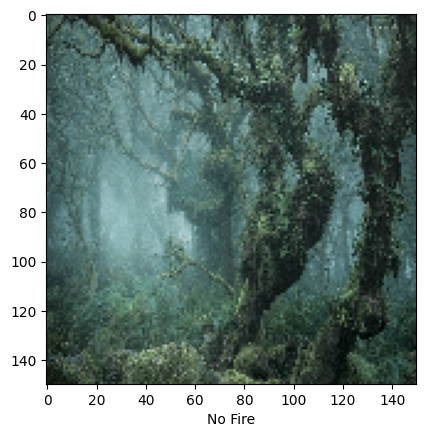

In [15]:
predictImage(r"C:\Users\ELCOT\Desktop\Python\new\Dataset\test_set\forest\01_NeilBurnell_Mystical_photoverticall.jpg")

[[1.]]


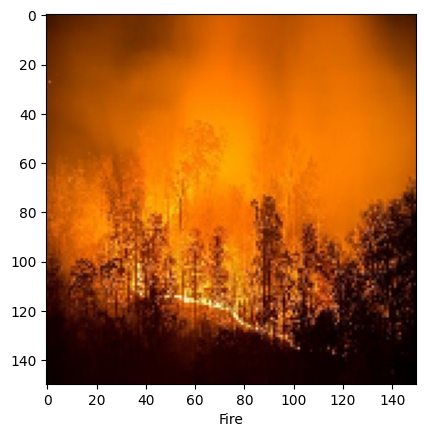

In [16]:
predictImage(r"C:\Users\ELCOT\Desktop\Python\new\Dataset\train_set\with fire\with fire (2).jpg")

[[0.]]


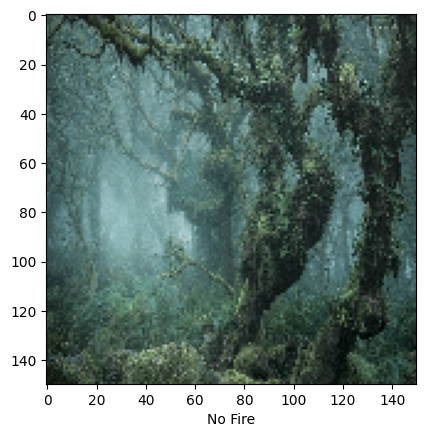

In [17]:
predictImage(r"C:\Users\ELCOT\Desktop\Python\new\Dataset\test_set\forest\01_NeilBurnell_Mystical_photoverticall.jpg")

[[1.]]


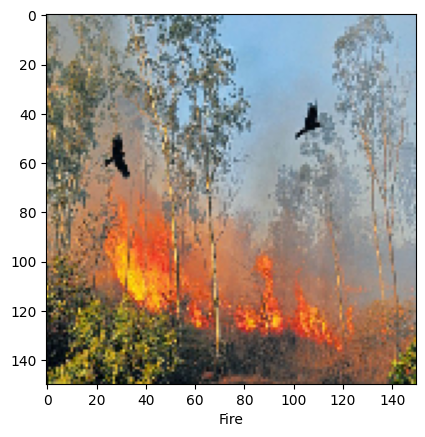

In [18]:
predictImage(r"C:\Users\ELCOT\Desktop\Python\new\Dataset\test_set\with fire\599857.jpg")